In [88]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

#Importing functions from UTILS.PY file
from utils import ALL_LETTERS, N_LETTERS
from utils import load_data, letter_to_tensor, line_to_tensor, random_training_example

In [89]:
# Defining Network for Name Classification

class NameClassification(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NameClassification, self).__init__()

        # Tuneable parameter 
        self.hidden_size = hidden_size
        
        # Network layers 
        self.input_to_hidden = nn.Linear(input_size + hidden_size, hidden_size)
        self.input_to_output = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_tensor, hidden_state_tensor):
        # Concatenating input and hidden state 
        combined = torch.cat((input_tensor, hidden_state_tensor), 1)

        hidden_state = self.input_to_hidden(combined)
        output = self.input_to_output(combined)
        output = self.softmax(output)
        
        #returning output and hidden state
        return output, hidden_state
    
    # Intial hidden state
    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)



In [90]:
#Parameters setting

hidden_size = 256
name_classifer = NameClassification(N_LETTERS, hidden_size, n_categories)
# Loss function "negative log likelihood"
criterion = nn.NLLLoss()
#learning rate
learning_rate = 0.003
# optimizer "stochastic gradient descent"
optimizer = torch.optim.SGD(name_classifer.parameters(), lr=learning_rate)

In [91]:
# Training Function

def training(line_tensor, category_tensor):
    hidden_state = name_classifer.init_hidden()
    # Training character by character
    for i in range(line_tensor.size()[0]):
        # getting output and hidden state 
        output, hidden_state = name_classifer(line_tensor[i], hidden_state)

    # loss calculation 
    loss = criterion(output, category_tensor)
    
    # optimizing loss with Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return loss.item()

In [92]:
# Training Loop

#loading data
category_lines, all_categories = load_data()

# intializing the loss and step veriables 
current_loss = 0
all_losses = []
plot_steps, print_steps = 1000, 5000

# number of iteration 
n_iters = 100000

# loop for each iteration
for i in range(n_iters):

    # getting random example from the dataset --- utils.py has this function
    category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)
    
    # passing through train function to get loss
    loss = training(line_tensor, category_tensor)
    current_loss += loss 
    
    if (i+1) % plot_steps == 0:
        all_losses.append(current_loss / plot_steps)
        current_loss = 0
        
    if (i+1) % print_steps == 0:
        #loss after every print_step (after every 5000 iterations)
        print(f"{i+1} {(i+1)/n_iters*100} {loss:.4f}")
        

5000 5.0 3.0771
10000 10.0 1.9893
15000 15.0 3.2529
20000 20.0 1.2987
25000 25.0 4.2676
30000 30.0 0.3422
35000 35.0 1.8967
40000 40.0 0.8016
45000 45.0 3.6518
50000 50.0 0.9250
55000 55.00000000000001 0.1041
60000 60.0 2.3253
65000 65.0 1.2530
70000 70.0 2.1554
75000 75.0 0.5861
80000 80.0 1.7677
85000 85.0 0.5416
90000 90.0 0.8272
95000 95.0 0.1527
100000 100.0 0.8639


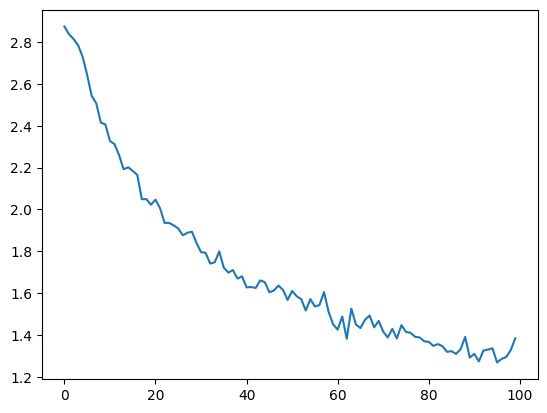

In [93]:
#ploting the loss 
plt.figure()
plt.plot(all_losses)
plt.show()